# Adding Signals

In [225]:
import sys
sys.path.append("..")

In [230]:
from scipy.io import wavfile
import scipy.signal as sps 
import wave
import numpy as np
import soundfile
from feature_generation import extract_spectrogram
import matplotlib.pyplot as plt
import specdisplay

/home/romulo/github/pyvenv/soundflux/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/romulo/github/pyvenv/soundflux/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/romulo/github/pyvenv/soundflux/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/romulo/github/pyvenv/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has b

In [133]:
new_rate = 16000
path = "/home/romulo/Downloads/449487__4177569399__group-talking.wav"

In [150]:
# Read file
#sampling_rate, data = wavfile.read(path)
data, sampling_rate = soundfile.read(path)
# Resample data
data_new = sps.decimate(data,3)
#number_of_samples = round(len(data) * float(new_rate) / sampling_rate)
#data = sps.resample(data, number_of_samples)

In [151]:
data.shape

(1107072,)

In [152]:
data_new.shape

(369024,)

In [153]:
sampling_rate

48000

In [154]:
filename = "/home/romulo/Downloads/resampled_449487__4177569399__group-talking.wav"
wavfile.write(filename, new_rate, data_new)

# Merging two files!

In [163]:
background_noise, bl_sample_rate = soundfile.read(filename)

In [164]:
fall_sound_file = "../samples/randy_sample_id_1552154736.711534.wav"
fall_sound, fall_sample_rate = soundfile.read(fall_sound_file)

In [165]:
fall_sample_rate == bl_sample_rate

True

In [195]:
np.squeeze(fall_sound[:,:1]).shape

(63941,)

In [169]:
background_noise[:fall_sound.shape[0]].shape

(63941,)

In [192]:
import scipy

In [220]:
#c = scipy.vstack((np.squeeze(fall_sound[:,:1]),background_noise[:fall_sound.shape[0]]))
c = np.add(np.squeeze(fall_sound[:,:1]),0.1*background_noise[:fall_sound.shape[0]])

In [221]:
c.T.shape

(63941,)

In [222]:
c_filename = "/home/romulo/Downloads/combined_449487__4177569399__group-talking.wav"
wavfile.write(c_filename, fall_sample_rate, c.T)

# Combined Spectrogram!

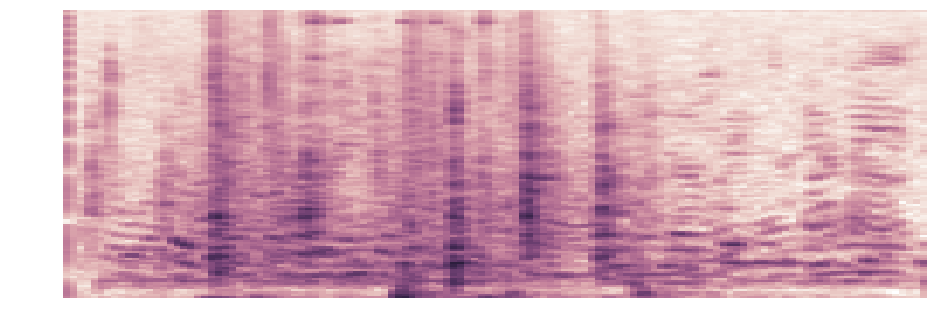

In [237]:
log_s = extract_spectrogram(c,fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.show()

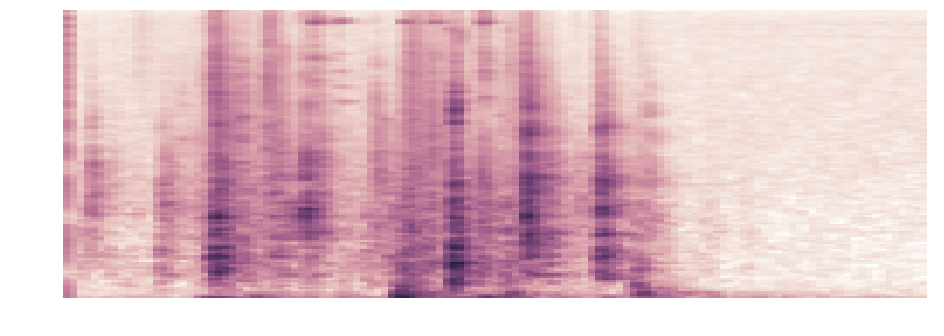

In [240]:
log_s = extract_spectrogram(fall_sound,fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.show()

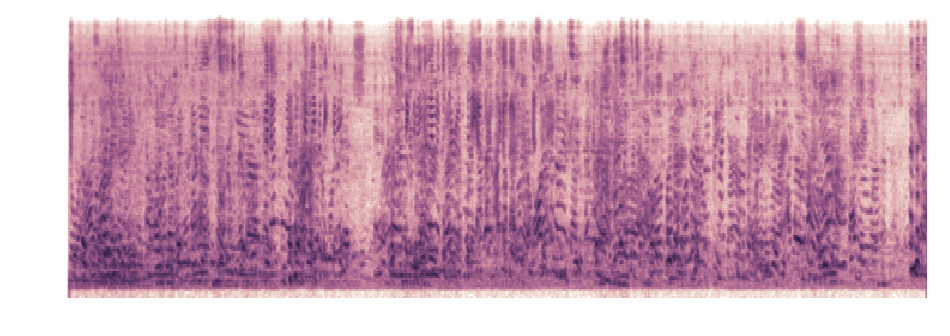

In [241]:
log_s = extract_spectrogram(0.1*background_noise,fall_sample_rate)
#new plot
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
#getting spectrogram
specdisplay.specshow(log_s, sr=fall_sample_rate, x_axis='time', y_axis='mel')
plt.show()